Importamos librerías comunes

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
PARKINGS = [
    "Gto-Alhondiga",
    "Gto-Alonso",
    "Gto-Hinojo",
    "Gto-SanPedro",
    "Gto-Pozuelos",
]

In [3]:
csv_path = "https://raw.githubusercontent.com/L4rralde/Parking_Lots/refs/heads/main/data/data.csv"

data = pd.read_csv(csv_path)
data = data.drop(columns=["Unnamed: 0"])
data["Fecha_Hora"] = pd.to_datetime(data["Fecha_Hora"])
data.set_index(["Fecha_Hora"], inplace=True)

Mostramos el hueco de datos.

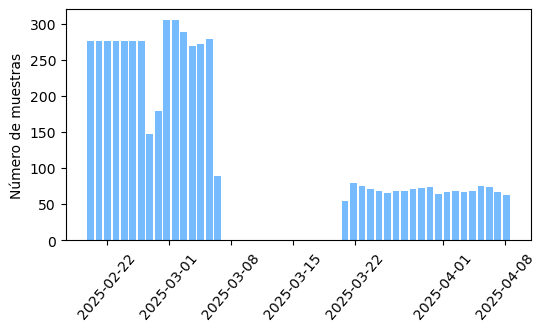

In [4]:
fig, axs = plt.subplots(1, 1, figsize=(6, 3))
axs.hist(data.index, color="xkcd:sky blue", bins=50, rwidth=0.8)
axs.tick_params(axis='x', labelrotation=50)
axs.set_ylabel("Número de muestras")
#axs[0].set_xticks([])
#data[PARKINGS].plot(ax = axs[1])
plt.savefig("media/sampling_dense.jpeg")

In [5]:
data

,Gto-Alhondiga,Gto-Alonso,Gto-Hinojo,Gto-Pozuelos,Gto-SanPedro,Irapuato-Hidalgo,Leon-Mariachi
Fecha_Hora,,,,,,,
2025-02-19 15:15:15,147,32,45,475,214,178,119
2025-02-19 15:20:15,145,32,45,482,210,179,117
2025-02-19 15:25:16,149,32,44,483,212,178,120
2025-02-19 15:30:16,148,33,43,484,214,178,122
2025-02-19 15:35:17,148,37,45,490,212,176,123
...,...,...,...,...,...,...,...
2025-04-08 13:20:16,161,51,18,482,235,188,60
2025-04-08 13:30:25,157,50,21,487,235,187,59
2025-04-08 13:45:35,160,50,23,487,235,188,66


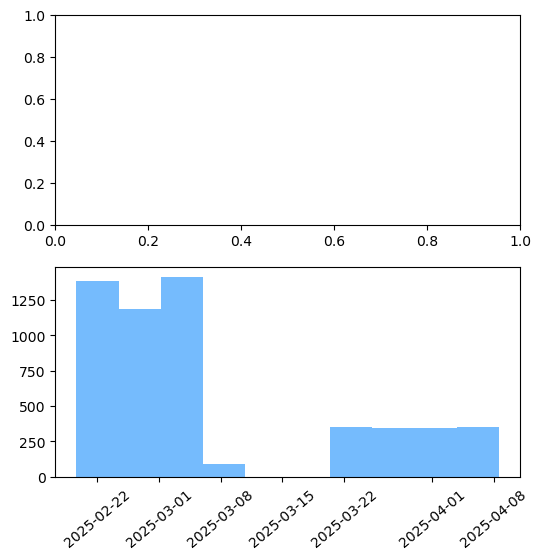

In [6]:
fig, axs = plt.subplots(2, 1, figsize=(6, 6))
axs[1].hist(data.index, color="xkcd:sky blue")
axs[1].tick_params(axis='x', labelrotation=40)
#axs[0].set_xticks([])
#data[PARKINGS].plot(ax = axs[1])
plt.show()

Afortunadamene todos los datos están completos

In [7]:
import numpy as np
print(np.isnan(data).any())

Gto-Alhondiga       False
Gto-Alonso          False
Gto-Hinojo          False
Gto-Pozuelos        False
Gto-SanPedro        False
Irapuato-Hidalgo    False
Leon-Mariachi       False
dtype: bool


No espero que exista normalidad

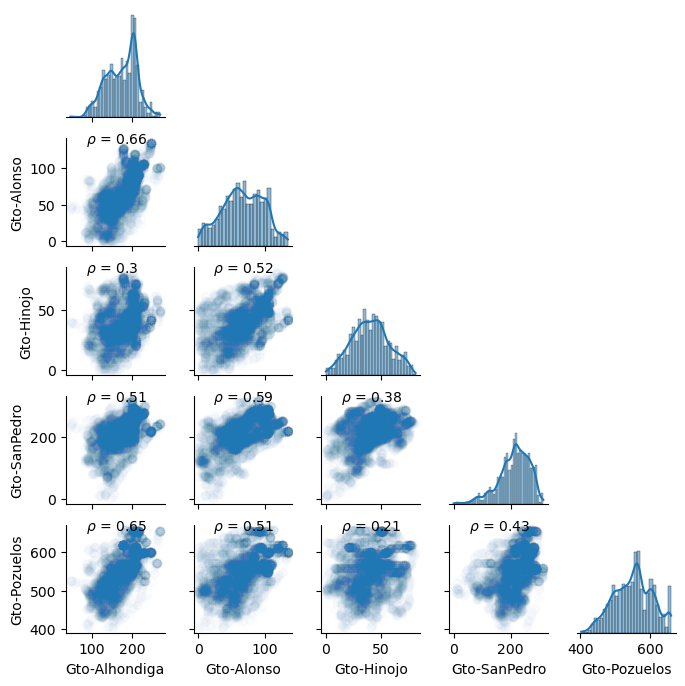

In [8]:
# Function to calculate correlation coefficient between two arrays
def corr(x, y, **kwargs):
    
    # Calculate the value
    coef = np.corrcoef(x, y)[0][1]
    # Make the label
    label = r'$\rho$ = ' + str(round(coef, 2))
    
    # Add the label to the plot
    ax = plt.gca()
    ax.annotate(label, xy = (0.2, 0.95), size = 10, xycoords = ax.transAxes)
    
# Create a pair grid instance
grid = sns.PairGrid(data[PARKINGS], height=1.4, corner=True)

# Map the plots to the locations
grid = grid.map_lower(corr)
grid = grid.map_lower(plt.scatter, alpha=0.01)
grid = grid.map_diag(sns.histplot, kde=True)
plt.savefig("media/pairsplot.jpeg")

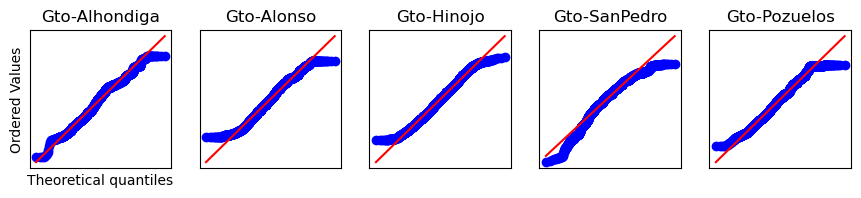

In [9]:
import scipy.stats as stats

fig, axs = plt.subplots(1, len(PARKINGS), figsize=(10.6, 1.8))

for i, (column, ax) in enumerate(zip(PARKINGS, axs)):
    stats.probplot(data[column], dist='norm', plot=ax)
    if i > 0:
        ax.set_xlabel("")
        ax.set_ylabel("")
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(column)
plt.savefig("media/qqplot.jpeg")

Sin embargo, hasta cierto punto, podemos asumir que hay normalidad

In [10]:
data["Hora"] = data.index.hour
data["Dia_Semana"] = data.index.weekday
data["Mes"] = data.index.month
data["Dia_Mes"] = data.index.day
day1 = pd.Timestamp(
    year = data.index[0].year,
    month = data.index[0].month,
    day = data.index[0].day
)
data["Dia"] = (data.index - day1).days + 1

/Users/l4rralde/miniconda3/envs/obspy/lib/python3.12/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/l4rralde/miniconda3/envs/obspy/lib/python3.12/site-packages/matplotlib/collections.py:194: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)
/Users/l4rralde/miniconda3/envs/obspy/lib/python3.12/site-packages/matplotlib/text.py:1461: ComplexWarning: Casting complex values to real discards the imaginary part
  x = float(self.convert_xunits(x))
/Users/l4rralde/miniconda3/envs/obspy/lib/python3.12/site-packages/matplotlib/text.py:1463: ComplexWarning: Casting complex values to real discards the imaginary part
  y = float(self.convert_yunits(y))
/Users/l4rralde/miniconda3/envs/obspy/lib/python3.12/site-packages/matplotlib/text.py:753: ComplexWarning: Casting complex values to real discards the imaginary part
  posx = float(se

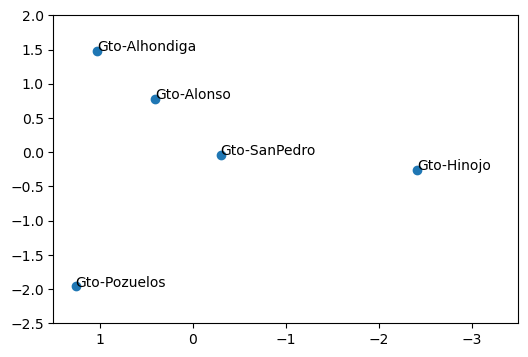

In [42]:
from src.mypca import DfPca

dia_hora = data.groupby(["Dia_Semana"]).mean()[PARKINGS]
dia_hora = (dia_hora - dia_hora.mean())/dia_hora.std()

my_pca = DfPca(dia_hora.T)
plt.figure(figsize=(6, 4.0))
plt.xlim((1.5, -3.5))
plt.ylim((-2.5, 2.0))
my_pca.scatter()

In [62]:
dia_hora

,Gto-Alhondiga,Gto-Alonso,Gto-Hinojo,Gto-SanPedro,Gto-Pozuelos
Dia_Semana,,,,,
0,1.509558,0.619052,-0.085514,0.425557,-0.105341
1,1.078322,0.810316,0.384831,0.739713,-0.424919
2,-0.253708,0.787594,0.680480,0.349599,-1.133778
3,0.058020,0.802869,-0.972483,0.963305,1.997937
4,-1.271008,-0.486524,1.429545,0.294262,0.384220
5,-0.911828,-1.620016,0.106171,-1.004279,-0.609729
6,-0.209356,-0.913292,-1.543031,-1.768158,-0.108390


Encontramos alguna relación con la posición geográfica de los estacionamientos en Guanajuato.

In [12]:
my_pca.explained_variance[0:2].sum()

(0.8348814290146837+0j)

In [13]:
data.max()

Gto-Alhondiga       268
Gto-Alonso          134
Gto-Hinojo           81
Gto-Pozuelos        659
Gto-SanPedro        315
Irapuato-Hidalgo    260
Leon-Mariachi       192
Hora                 23
Dia_Semana            6
Mes                   4
Dia_Mes              31
Dia                  49
dtype: int64

In [14]:
data.min()

Gto-Alhondiga        48
Gto-Alonso            0
Gto-Hinojo            0
Gto-Pozuelos        403
Gto-SanPedro          0
Irapuato-Hidalgo     12
Leon-Mariachi         9
Hora                  0
Dia_Semana            0
Mes                   2
Dia_Mes               1
Dia                   1
dtype: int64

## Clustering
A continuación se buscarán grupos que podrían ser de interés.

In [15]:
data_2 = data.groupby(["Dia", "Hora"]).mean()
normalized = (data_2 - data_2.mean())/data_2.std()

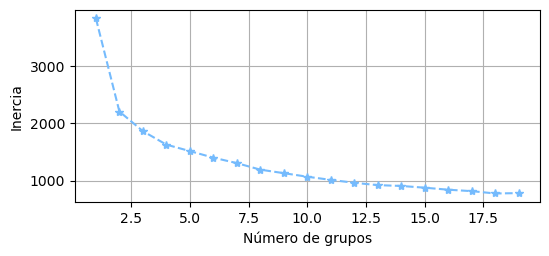

In [49]:
from sklearn.cluster import KMeans

maxk = 20
inertias = [
    KMeans(k).fit(normalized[PARKINGS]).inertia_
    for k in range(1, maxk)
]

plt.figure(figsize=(6, 2.5))
plt.plot(range(1, maxk), inertias, '--*', color="xkcd:sky blue")
plt.ylabel("Inercia")
plt.xlabel("Número de grupos")
plt.grid()
plt.savefig("media/clustering_k.jpeg")

Probemos con 2 grupos. $k=3$ también podría ser una buena propuesta.

In [17]:
k = 2
kmeans = KMeans(k).fit(normalized[PARKINGS])
pca_for_kmeans = DfPca(normalized[PARKINGS])

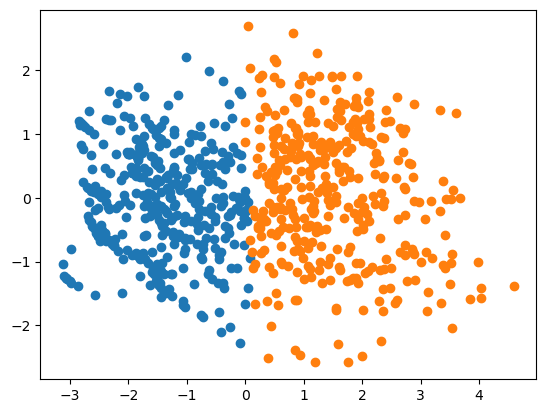

In [18]:
#%matplotlib ipympl
#ax = plt.figure().add_subplot(projection='3d')
ax = plt.figure().add_subplot()
projected_data = pca_for_kmeans.fit_transform(normalized[PARKINGS], 3)
for label in range(k):
    subset = projected_data[kmeans.labels_ == label]
    #ax.scatter(subset[0], subset[1], subset[2])
    ax.scatter(subset[0], subset[1])

In [19]:
pca_for_kmeans.explained_variance[0:2].sum()

0.7504954124123747

In [20]:
data_2["label"] = kmeans.labels_
data_2.reset_index(inplace=True)

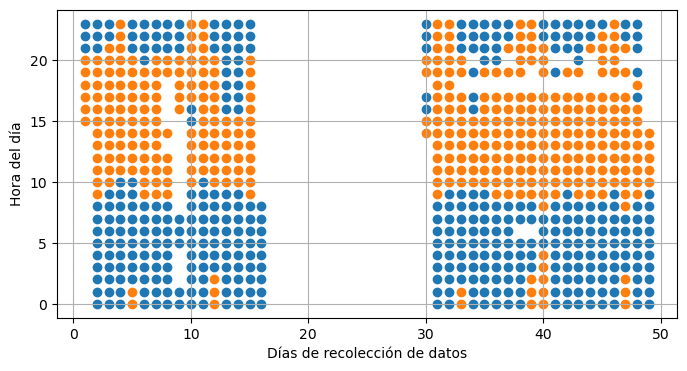

In [58]:

plt.figure(figsize=(8, 4))
for label in range(k):
    subset = data_2[data_2["label"] == label]
    plt.scatter(subset["Dia"], subset["Hora"], label=label)
plt.xlabel("Días de recolección de datos")
plt.ylabel("Hora del día")
plt.grid()
plt.savefig("media/clusters.jpeg")
plt.show()

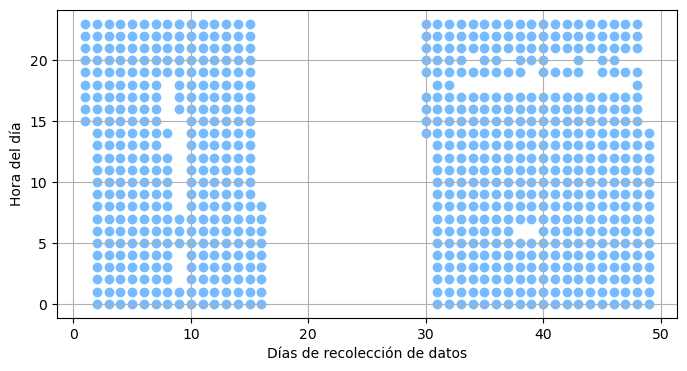

In [22]:
plt.figure(figsize=(8, 4))
plt.scatter(data_2["Dia"], data_2["Hora"], alpha=1.0, color="xkcd:sky blue")
plt.xlabel("Días de recolección de datos")
plt.ylabel("Hora del día")
plt.grid()
plt.savefig("sampling.jpeg")
plt.show()

In [23]:
data_2["Fecha"] = [
    pd.Timestamp(year=2025, month=int(row["Mes"]), day=int(row["Dia_Mes"]), hour=int(row["Hora"]))
    for _, row in data_2.iterrows()
]

/var/folders/y8/gfw8crg95jdf0ymxjbqm7hlm0000gn/T/ipykernel_16638/1862757503.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(xtick_labels, rotation=50)


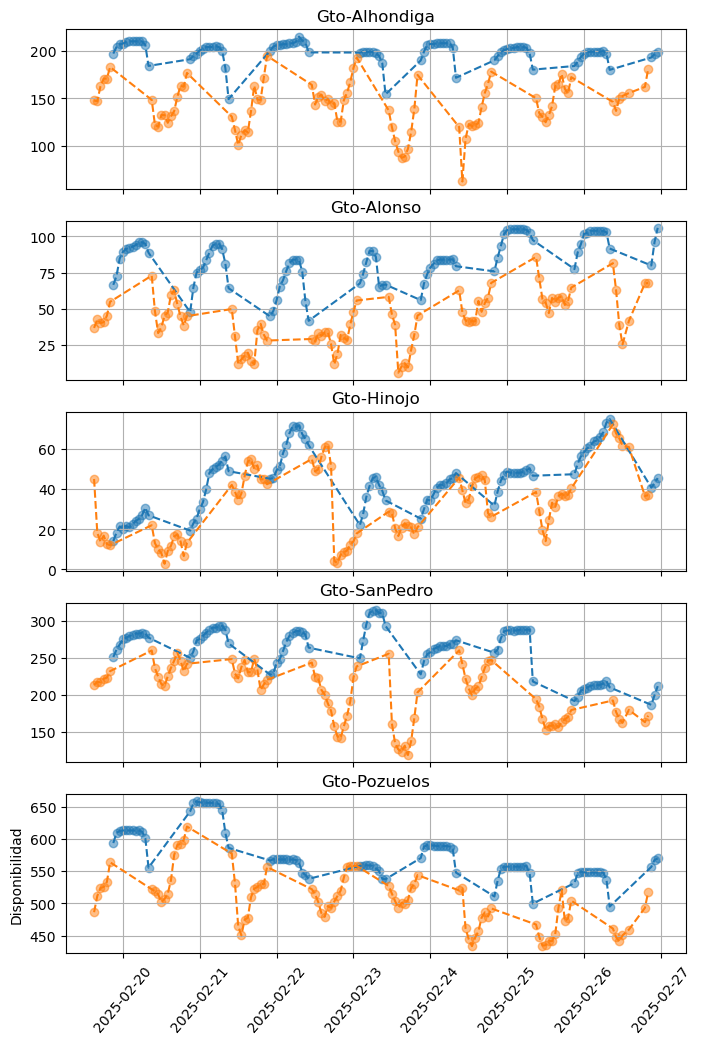

In [61]:
fig, axs = plt.subplots(len(PARKINGS), 1, figsize=(8, 12))
first_week = data_2[data_2["Dia"] < 9]
for ax, parking in zip(axs, PARKINGS):
    for label in range(k):
        subset = first_week[first_week["label"] == label].set_index(["Fecha"])
        ax.plot(subset.index, subset[parking], '--')
        ax.scatter(subset.index, subset[parking], alpha=0.5)
    ax.set_title(parking)
    ax.grid()
    xtick_labels = ax.get_xticklabels([])
    if ax != axs[-1]:
        ax.set_xticklabels([])
    else:
        ax.set_xticklabels(xtick_labels, rotation=50)
        ax.set_ylabel("Disponibilidad")
plt.savefig("media/clusters_timelapse.jpeg")
plt.show()

No se obtiene más información relevante usando clustering aglomerativo

In [25]:
from sklearn.cluster import AgglomerativeClustering

clustering = AgglomerativeClustering().fit(data_2[PARKINGS])

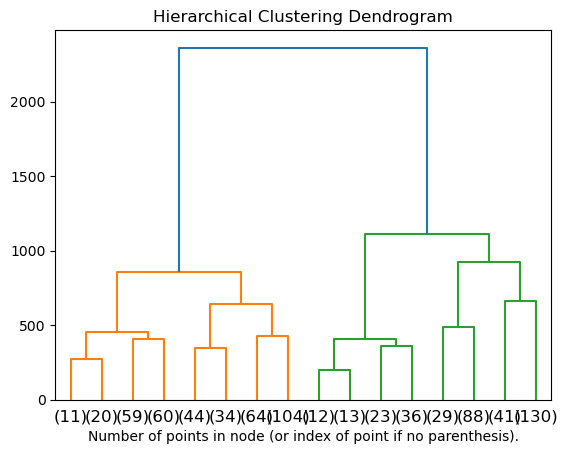

In [26]:
from copy import deepcopy
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram
    model = deepcopy(model)
    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(data_2[PARKINGS])
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [27]:
from copy import deepcopy
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram
    model = deepcopy(model)
    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

# setting distance_threshold=0 ensures we compute the full tree.
#model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
kh = 4
model = AgglomerativeClustering(n_clusters = kh)
model = model.fit(data_2[PARKINGS])
#plt.title("Hierarchical Clustering Dendrogram")
## plot the top three levels of the dendrogram
#plot_dendrogram(model, truncate_mode="level", p=3)
#plt.xlabel("Number of points in node (or index of point if no parenthesis).")
#plt.show()

/var/folders/y8/gfw8crg95jdf0ymxjbqm7hlm0000gn/T/ipykernel_16638/1728123415.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(xtick_labels, rotation=90)


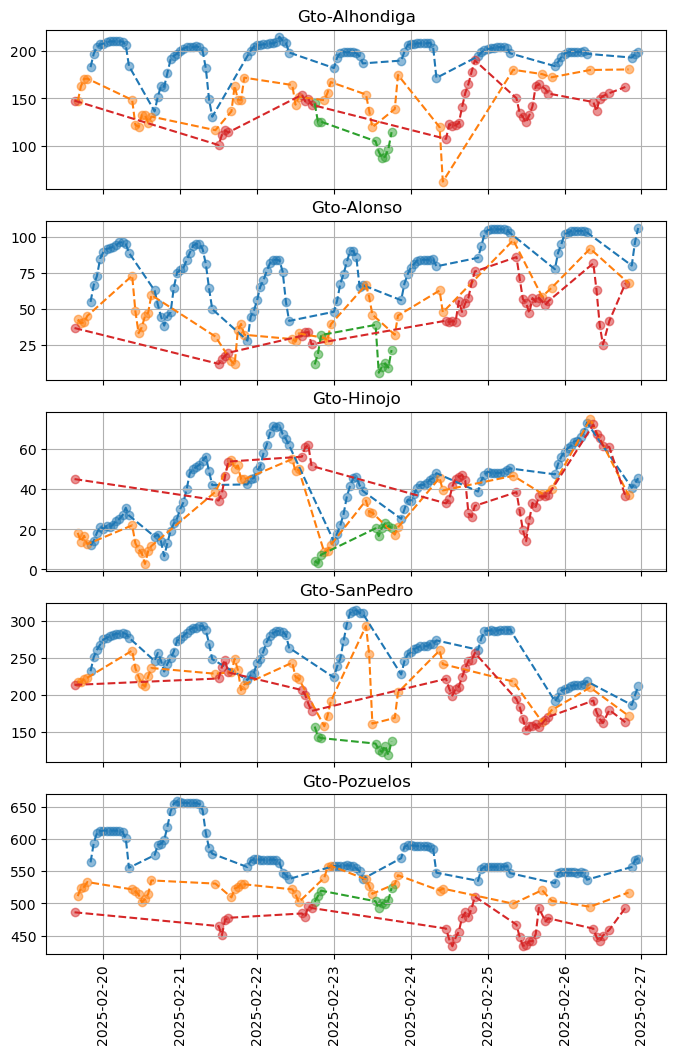

In [28]:
fig, axs = plt.subplots(len(PARKINGS), 1, figsize=(8, 12))
data_2["label_2"] = model.labels_
first_week = data_2[data_2["Dia"] < 9]
for ax, parking in zip(axs, PARKINGS):
    for label in range(kh):
        subset = first_week[first_week["label_2"] == label].set_index(["Fecha"])
        ax.plot(subset.index, subset[parking], '--')
        ax.scatter(subset.index, subset[parking], alpha=0.5)
    ax.set_title(parking)
    ax.grid()
    xtick_labels = ax.get_xticklabels([])
    if ax != axs[-1]:
        ax.set_xticklabels([])
    else:
        ax.set_xticklabels(xtick_labels, rotation=90)
plt.show()

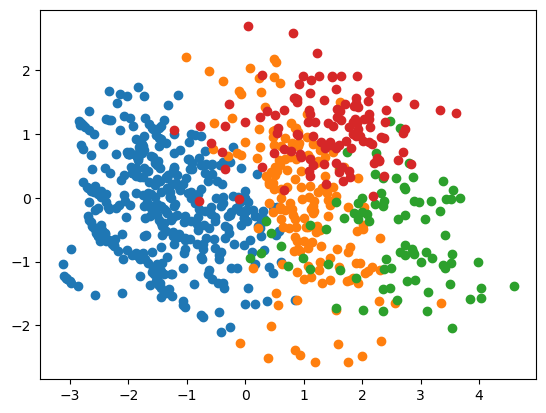

In [29]:
#%matplotlib ipympl
#ax = plt.figure().add_subplot(projection='3d')
ax = plt.figure().add_subplot()
projected_data = pca_for_kmeans.fit_transform(normalized[PARKINGS], 3)
for label in range(kh):
    subset = projected_data[model.labels_ == label]
    #ax.scatter(subset[0], subset[1], subset[2])
    ax.scatter(subset[0], subset[1])

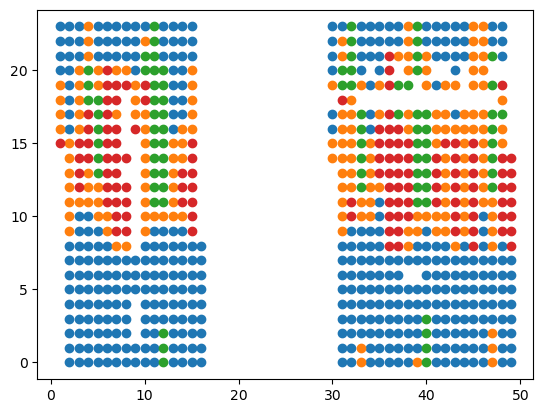

In [30]:
plt.figure()
for label in range(kh):
    subset = data_2[data_2["label_2"] == label]
    plt.scatter(subset["Dia"], subset["Hora"])
plt.show()